In [1]:
#Importando bibliotecas
source("https://raw.githubusercontent.com/cefet-rj-dal/daltoolbox-examples/main/jupyter.R")

In [38]:
load_library("daltoolbox")
library(dplyr)
library(ggplot2)
library(daltoolbox)
library(RColorBrewer)
library(GGally)
library(reshape)
library(corrplot)
library(WVPlots)
library(aplpack)
library(gridExtra)
library(tidyr)
library(lubridate)



Attaching package: ‘lubridate’


The following object is masked from ‘package:reshape’:

    stamp


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [3]:
# Loading dataset
load('/home/data/malaria/malaria.RData')

In [4]:
# Exibe as Colunas
head(data)

,infection.county,home.county,notification.county,qty.parasites,scheme,notification.hr,home.hr,infection.hr,exam.type,exam.result,⋯,exam.month,exam.year,treatment.month,treatment.year,symptom.month,symptom.year,exam.interval,treatment.interval,notification.interval,previous.treatment
,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<ord>,<ord>,<ord>,<ord>,<ord>,<ord>,<ord>,<ord>,<ord>,<fct>
1,110001,110001,110001,501100,1,ZONA DA MATA,ZONA DA MATA,ZONA DA MATA,thick and thin blood smears,vivax,⋯,02,2014,02,2014,02,2014,on the same day,on the same day,on the same day,vivax
2,110001,110001,110001,NA,1,ZONA DA MATA,ZONA DA MATA,ZONA DA MATA,thick and thin blood smears,vivax,⋯,12,2014,12,2014,12,2014,on the same day,on the same day,1 to 7 days,vivax
3,110001,110001,110001,NA,1,ZONA DA MATA,ZONA DA MATA,ZONA DA MATA,thick and thin blood smears,vivax,⋯,11,2014,11,2014,11,2014,on the same day,on the same day,on the same day,no
4,110001,110001,110001,NA,1,ZONA DA MATA,ZONA DA MATA,ZONA DA MATA,thick and thin blood smears,vivax,⋯,10,2013,10,2013,10,2013,on the same day,on the same day,1 to 7 days,no
5,110001,110001,110001,3,1,ZONA DA MATA,ZONA DA MATA,ZONA DA MATA,thick and thin blood smears,vivax,⋯,10,2014,10,2014,10,2014,on the same day,on the same day,1 to 7 days,no
6,110001,110001,110001,305500,1,ZONA DA MATA,ZONA DA MATA,ZONA DA MATA,thick and thin blood smears,vivax,⋯,11,2013,11,2013,NA,NA,1 to 7 days,on the same day,NA,no


In [5]:
# Visão Geral dos Dados
summary(data)

 infection.county    home.county       notification.county qty.parasites     
 130260 :  254086   130260 :  341082   120020 : 2367517    Min.   :     0    
 120020 :  195149   120020 :  199012   130260 : 2076083    1st Qu.:    60    
 150070 :  143708   150070 :  138806   110020 : 1018178    Median :   700    
 110020 :  138296   110020 :  137645   120033 :  881393    Mean   :  3335    
 130380 :   98734   130380 :   96825   130040 :  682656    3rd Qu.:  2500    
 (Other): 2064572   (Other): 2053342   150070 :  617060    Max.   :999999    
 NA's   :20029432   NA's   :19957265   (Other):15281090    NA's   :22062051  
     scheme                                notification.hr   
 1      : 2192733   MANAUS ENTORNO E ALTO RIO NEGRO:4245518  
 99     :  208923   JURUA E TARAUACA/ENVIRA        :3940345  
 5      :   95601   MADEIRA-MAMORE                 :1318581  
 2      :   47841   REGIONAL JURUA                 :1256899  
 11     :   46571   MARAJO II                      :1234896  
 (Ot

In [6]:
# Amostra dos Valores de Cada Coluna
glimpse(data)

Rows: 22,923,977
Columns: 40
$ infection.county      <fct> 110001, 110001, 110001, 110001, 110001, 110001, …
$ home.county           <fct> 110001, 110001, 110001, 110001, 110001, 110001, …
$ notification.county   <fct> 110001, 110001, 110001, 110001, 110001, 110001, …
$ qty.parasites         <dbl> 501100, NA, NA, NA, 3, 305500, NA, NA, NA, 50110…
$ scheme                <fct> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 99, 1, 1, 1,…
$ notification.hr       <fct> ZONA DA MATA, ZONA DA MATA, ZONA DA MATA, ZONA D…
$ home.hr               <fct> ZONA DA MATA, ZONA DA MATA, ZONA DA MATA, ZONA D…
$ infection.hr          <fct> ZONA DA MATA, ZONA DA MATA, ZONA DA MATA, ZONA D…
$ exam.type             <fct> thick and thin blood smears, thick and thin bloo…
$ exam.result           <fct> vivax, vivax, vivax, vivax, vivax, vivax, vivax,…
$ gender                <fct> male, male, male, male, female, male, female, ma…
$ hemiparasite          <fct> negative, not researched, negative, not research…
$ symptom  

In [7]:
# número de linhas e colunas
print(paste("Número de Linhas:",nrow(data)))
print(paste("Número de Colunas:",ncol(data)))

[1] "Número de Linhas: 22923977"
[1] "Número de Colunas: 40"


In [8]:
# Separado algumas colunas para estudo
ref <- data %>% select(notification.county,notification.year,qty.parasites,exam.result,gender,home.state,age,previous.treatment)

In [9]:
#retira valores nulos, os NA 
sr <- na.omit(ref)

Cria uma amostra usei essa técnica para rodar os plots de forma mais rápida afim de ajustá-los depois foi comentado posteriormente para usar os dados originais

In [10]:
#sr <- sample_n(ref, 1000)
#pos <- sr[sr$exam.result != negative, ]

In [11]:
# Verifica os tipos de resultados

sr %>% count(sr$exam.result)
ref %>% count(ref$exam.result)

sr$exam.result,n
<fct>,<int>
negative,6
falciparum,51142
F+FG,8310
vivax,457145
F+V,4471
V+FG,1216
FG,2017
malariae,247
F+M,144


ref$exam.result,n
<fct>,<int>
negative,20186404
falciparum,262440
F+FG,48518
vivax,2365980
F+V,17083
V+FG,8159
FG,11596
malariae,686
F+M,403


In [12]:
# A tentativa de tirar valores nulos reduziu demais os registros conforme comparação abaixo

#Separa tabelas para Matriz
split <- ref %>% select (gender,age,exam.result)

In [13]:
#Aplicado filtro aos valores mais usados para o gráfico pois os demais campos eram muito irrelevantes para aparecer no gráfico <- split %>% filter(exam.result == 'vivax' | exam.result == 'falciparum')
#também retira os resultados negativos

split <- split %>% filter (exam.result=="vivax" | exam.result=="falciparum")

Warning message:
“Removed 6 rows containing non-finite values (`stat_g_gally_count()`).”
Warning message:
“Removed 6 rows containing non-finite values (`stat_g_gally_count()`).”
Warning message:
“Removed 34 rows containing non-finite values (`stat_g_gally_count()`).”


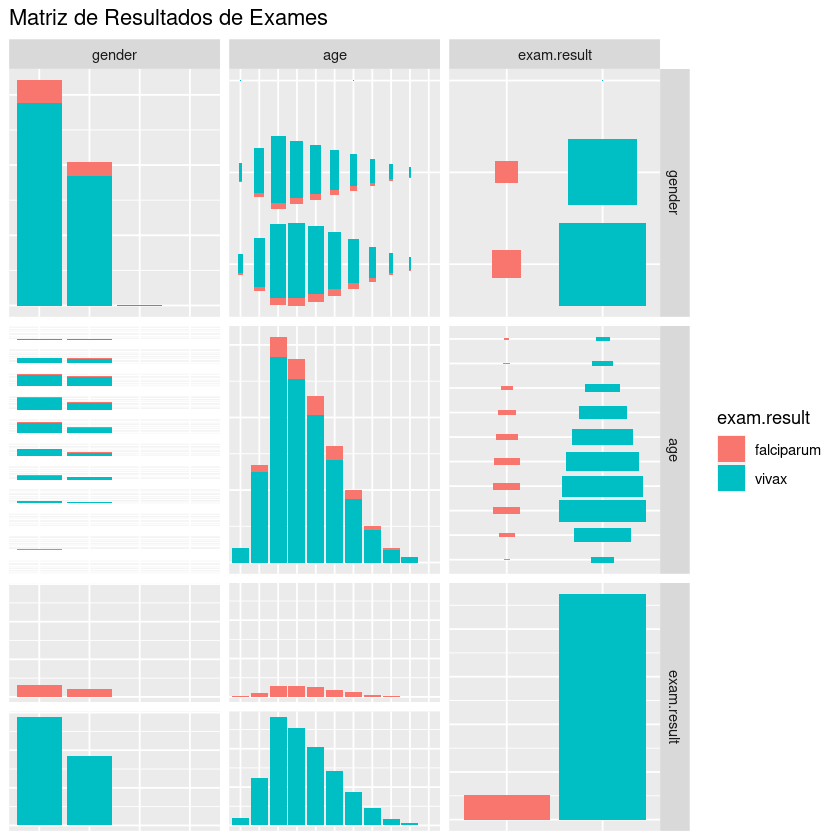

In [14]:
#Criando a Matriz de Dispersão

# a função pairs tem poucas opções de edição, optado por usar o ggpairs
#pairs(sr[, c(1, 1:4)])
#pairs(sr[, c(1, 5:8)])


ggpairs(
    split,
    #columns=c(4,5,7),
    cardinality_threshold=NULL,
    aes(color = exam.result),
    upper = list(continuous = "points",combo = "box_no_facet",discrete = "count", na = "na"),
    lower = list(continuous = "smooth",combo = "facethist", discrete = "facetbar", na = "na"),
    diag = list(continuous = "blankDiag",discrete = "barDiag",na = "naDiag"),
    title = "Matriz de Resultados de Exames",
    legend = 1,
    axisLabels = "none"
)

In [15]:
# selecionar coluna referente as 5 maiores regiões com maior incidência de casos

regiao <- select(data,home.state)
regiao <- na.omit(regiao) 
regiao <- regiao %>% group_by(home.state) %>% count(home.state, sort=TRUE)
regiao <- head(regiao,n=5)

In [16]:
#Configuração do Plot Bar
colors <- brewer.pal(5, 'Set2')
font <- theme(text = element_text(size=16))
grf <- plot_bar(regiao, 
                colors=colors[1:5], 
                alpha=0.7,
                label_x = "Estados", 
                label_y = "Número de Casos") + font

[1] "Os 5 estados com maior incidência de casos"


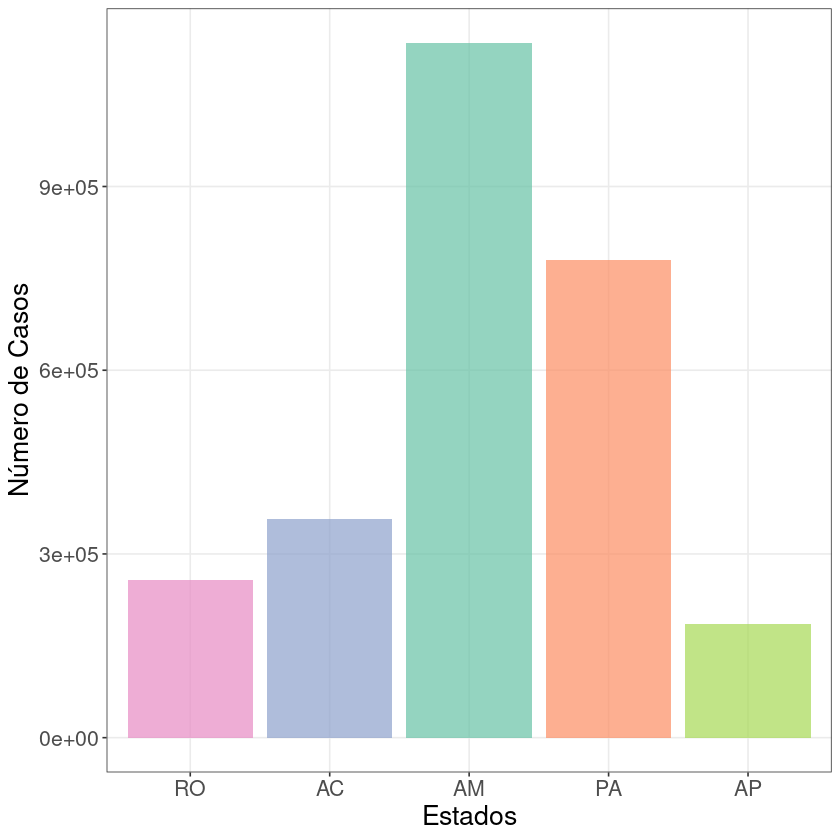

In [17]:
grf <- plot_bar(regiao, 
                colors=colors[1:5], 
                alpha=0.7,
                label_x = "Estados", 
                label_y = "Número de Casos") + font

#plot_bar não deixa colocar title :(
print("Os 5 estados com maior incidência de casos")

plot(grf)

In [18]:
# Incidência de Casos Positivos e Negativos
# Pré-processamento dos dados

result <- select(data, exam.result, exam.year, exam.month) # seleciona colunas
result <- result %>% unite(data, c(exam.year,exam.month)) # concatena datas
result <- na.omit(result) # retira valores NA
result <- result %>% mutate(exam.result = ifelse(exam.result == 'negative','negative','positive')) # simplifica resultados
result <- result %>% group_by(result$exam.result,data) %>% count(result$exam.result) # agrupa por ano e mes
result

result$exam.result,data,n
<chr>,<chr>,<int>
negative,2009_01,2378
negative,2009_02,2399
negative,2009_03,2686
negative,2009_04,1787
negative,2009_05,2625
negative,2009_06,2666
negative,2009_07,2767
negative,2009_08,2465
negative,2009_09,2434


Buscou-se entender quais eram os tipos de dados contidos nas colunas e a frequências de cada um deles. Junto disso foi realizada a leitura de 'An integrated dataset of malaria notifications in the Legal Amazon'.

A função table fez isso. lapply foi usado pra aplicar table em todas as colunas.

In [19]:
frequency_tables <- lapply(data, table)

as.data.frame foi utilizado para organizar a informação num dataframe

In [20]:
frequency_tables_df <- lapply(frequency_tables, as.data.frame.table)

Foi realizada uma análise visual geral de cada uma das features.

In [21]:
x <- frequency_tables_df$infection.hr
x

Var1,Freq
<fct>,<int>
10A REGIAO,1
10A REGIAO DE SAUDE,1
10A REGIAO LIMOEIRO DO NORTE,3
11A RS CAMPO MOURAO,2
12A REGIAO,1
13A REGIAO TIANGUA,2
14A RS PARANAVAI,1
15A RS MARINGA,1
16A RS APUCARANA,1


Houve um procedimento de Data Fusion onde diversos datasets sobre o mesmo assunto forem unidos, cada dataset original está neste feature chamado scheme.

E também surgiram intuições sobre outras colunas. As tabelas .hr parecem ser como clusters dos .county pois a quantidade de classes é muito menor pros mesmos tipos de informação (notification,infection e home). 
Através da leitura do artigo chegamos à resposta sobre isso também.
Houve um procedimento de Data Enrichment onde aumentaram os dados com informações do DATASUS. Criaram essas 3 features notification.hr, infection.hr and home.hr .

Exames, existem 2 tipos e 11 resultados.
Estão registrados 4 parasitas (sendo 1 'desconhecidos').
Estão registrados 3 tipos de tratamentos anteriores.
A tabela de sintomas é um booleano
A tabela home.country é bem interessante, porque apesar da quantidade de pacientes residentes dos paises da região pesquisada ser muito maior, a análise de dos outliers poderia inferir algo como a origem de uma doença.
A feature autochthonous.case parece ser uma feature bem útil, porque pode ajudar na análise sobre a sensibilidade dos nativos.
A feature age foi posta em bins de grupos de idades.
A feature treatment.year tem vários anos , provavelmente o database está com algum erro.
Os atributos são na maioria categóricos.

## Separando dados categóricos dos não categóricos

In [22]:
categorical_columns <- sapply(data, is.factor)
categorical_data <- data[, categorical_columns]
not_categorical_columns <- data[, !categorical_columns]

## Resolução e granularidade

Acho que a informação .county ficou desligada das outras informações de regiões pois somente com aqueles números é impossível saber de qual região se trata. A informação das health regions .hr está muito mais intuitiva.
A tabela de sintomas ser um booleano é algo simples demais, quais sintomas?

In [23]:
#...

## Desbalanceamento de classes

In [24]:
#Função para checar desbalanceamento de classes
class_balance_check <- function(category_count_of_feature) {
  max_count <- max(category_count_of_feature)
  min_count <- min(category_count_of_feature)
  imbalance_check <- max_count > 20 * min_count
  
  imbalance_check
}

In [25]:
imbalance_results <- lapply(categorical_data, function(column) {
    column_table <- table(column)
    class_balance_check(column_table)
})

In [26]:
true_count <- sum(imbalance_results == TRUE)
false_count <- sum(imbalance_results == FALSE)

In [27]:
cat("Classes desbalanceadas:", true_count, "\n")
cat("Classes balanceadas:", false_count)

Classes desbalanceadas: 30 
Classes balanceadas: 9

In [28]:
imbalance_results

$infection.county
[1] TRUE

$home.county
[1] TRUE

$notification.county
[1] TRUE

$scheme
[1] TRUE

$notification.hr
[1] TRUE

$home.hr
[1] TRUE

$infection.hr
[1] TRUE

$exam.type
[1] TRUE

$exam.result
[1] TRUE

$gender
[1] TRUE

$hemiparasite
[1] TRUE

$symptom
[1] FALSE

$race
[1] TRUE

$occupation
[1] TRUE

$detection.type
[1] FALSE

$education.level
[1] TRUE

$pregnancy
[1] TRUE

$crosses
[1] TRUE

$cvl.case
[1] FALSE

$home.state
[1] TRUE

$infection.state
[1] TRUE

$notification.state
[1] TRUE

$home.country
[1] TRUE

$infection.country
[1] TRUE

$migration
[1] TRUE

$autochthonous.case
[1] FALSE

$age
[1] TRUE

$notification.month
[1] FALSE

$notification.year
[1] FALSE

$exam.month
[1] FALSE

$exam.year
[1] TRUE

$treatment.month
[1] FALSE

$treatment.year
[1] TRUE

$symptom.month
[1] FALSE

$symptom.year
[1] TRUE

$exam.interval
[1] TRUE

$treatment.interval
[1] TRUE

$notification.interval
[1] TRUE

$previous.treatment
[1] TRUE

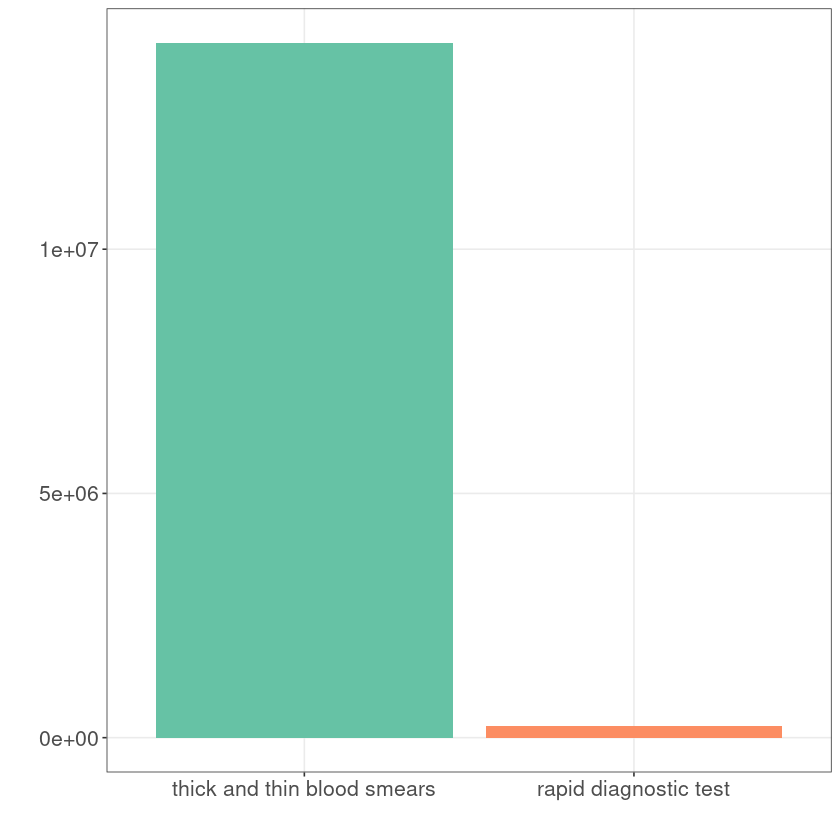

In [29]:
category_counts <- table(data$exam.type)
grf <- plot_bar(category_counts, colors=colors[1:2]) + font
plot(grf)

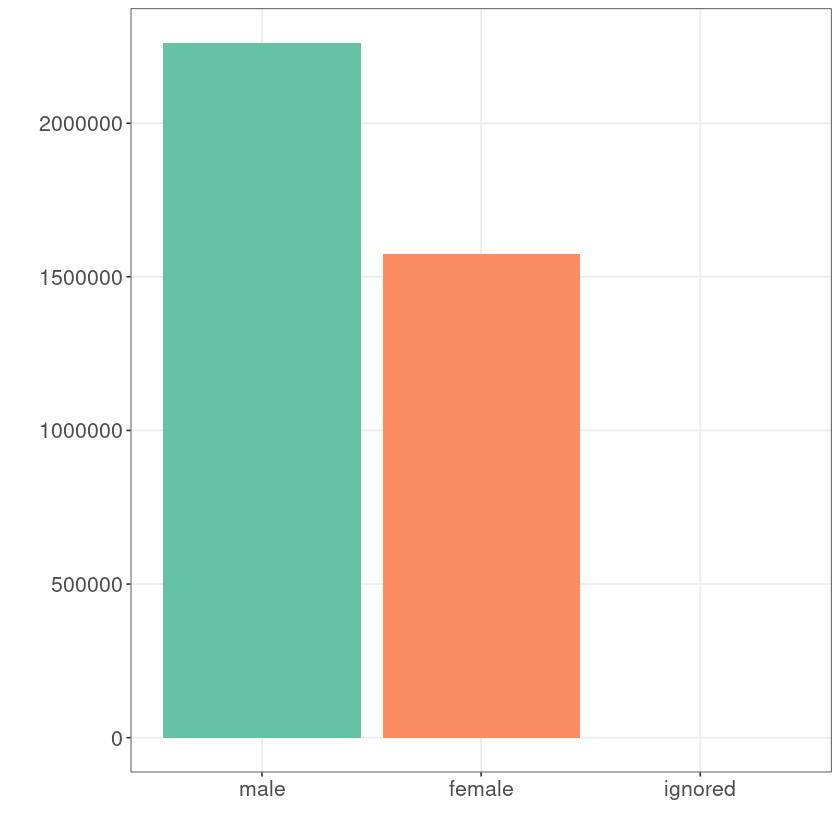

In [30]:
category_counts <- table(data$gender)
grf <- plot_bar(category_counts, colors=colors[1:3]) + font
plot(grf)

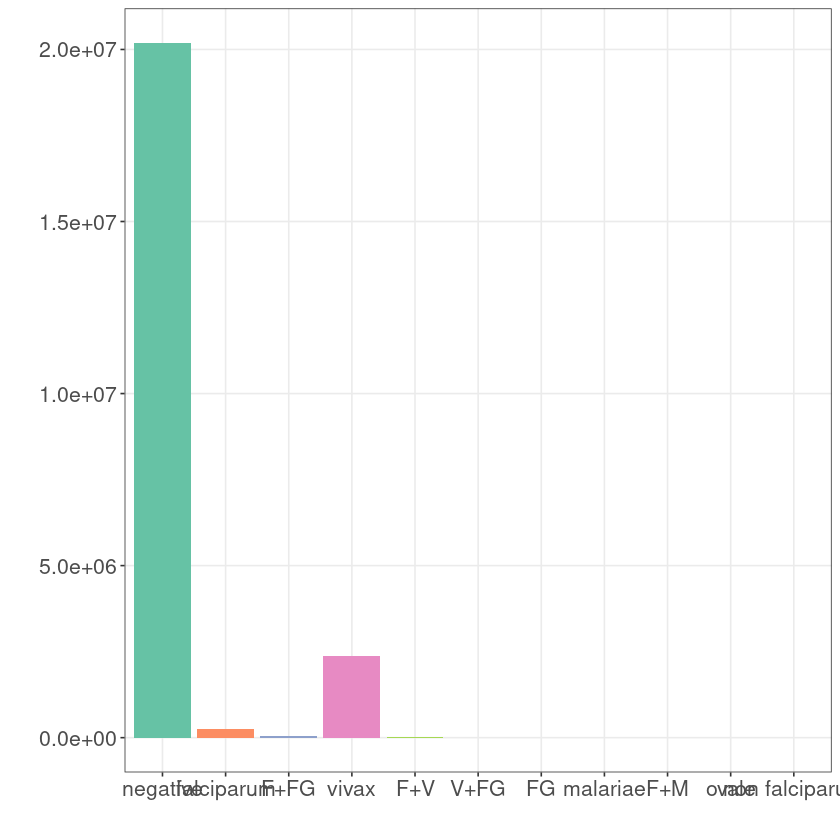

In [31]:
category_counts <- table(data$exam.result)
grf <- plot_bar(category_counts, colors=colors[1:11]) + font
plot(grf)

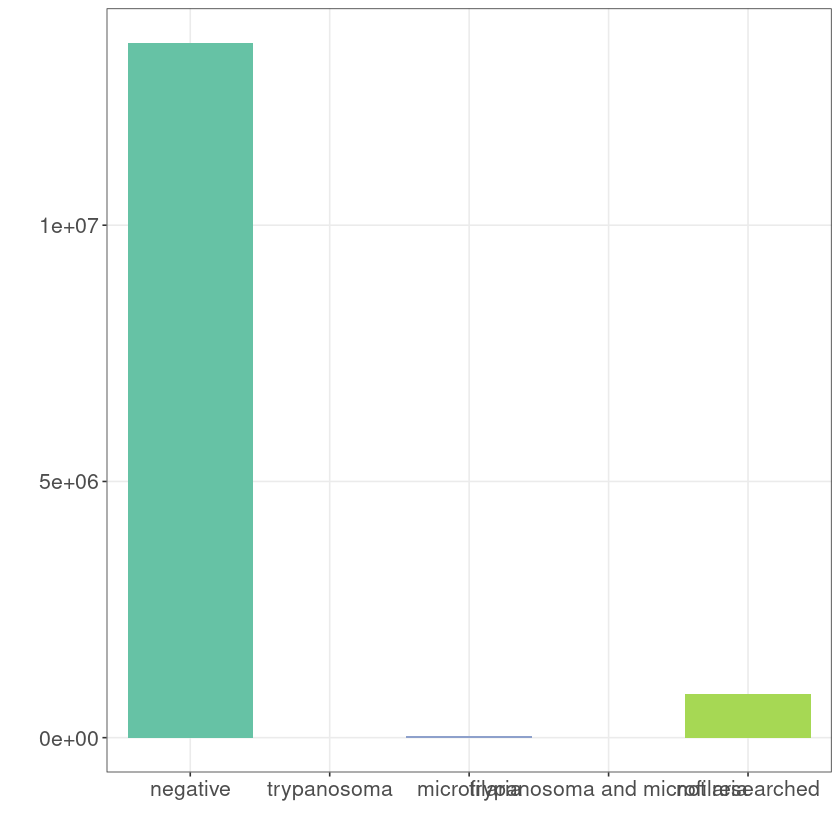

In [32]:
category_counts <- table(data$hemiparasite)
grf <- plot_bar(category_counts, colors=colors[1:5]) + font
plot(grf)

In [33]:
#Retirando os NAs para análise exploratória com plots
data.na <- data
data.na.omit <- na.omit(data.na)

In [34]:
#Entendendo agrupamento e filtragem de dados
x <- data.na.omit |> group_by(infection.county ) |> summarize(exam.result=first(exam.result))
#O código acima é equivalente a:
x <- summarize(group_by(data.na.omit, infection.county), exam.result=first(exam.result))

In [35]:
imbalance_results

$infection.county
[1] TRUE

$home.county
[1] TRUE

$notification.county
[1] TRUE

$scheme
[1] TRUE

$notification.hr
[1] TRUE

$home.hr
[1] TRUE

$infection.hr
[1] TRUE

$exam.type
[1] TRUE

$exam.result
[1] TRUE

$gender
[1] TRUE

$hemiparasite
[1] TRUE

$symptom
[1] FALSE

$race
[1] TRUE

$occupation
[1] TRUE

$detection.type
[1] FALSE

$education.level
[1] TRUE

$pregnancy
[1] TRUE

$crosses
[1] TRUE

$cvl.case
[1] FALSE

$home.state
[1] TRUE

$infection.state
[1] TRUE

$notification.state
[1] TRUE

$home.country
[1] TRUE

$infection.country
[1] TRUE

$migration
[1] TRUE

$autochthonous.case
[1] FALSE

$age
[1] TRUE

$notification.month
[1] FALSE

$notification.year
[1] FALSE

$exam.month
[1] FALSE

$exam.year
[1] TRUE

$treatment.month
[1] FALSE

$treatment.year
[1] TRUE

$symptom.month
[1] FALSE

$symptom.year
[1] TRUE

$exam.interval
[1] TRUE

$treatment.interval
[1] TRUE

$notification.interval
[1] TRUE

$previous.treatment
[1] TRUE

In [39]:
# Incidência de Casos Positivos e Negativos
# Pré-processamento dos dados

result <- select(data, exam.result, exam.year, exam.month) # seleciona colunas
result <- result %>% unite(data, c(exam.year,exam.month)) # concatena datas
result <- na.omit(result) # retira valores NA
result <- result %>% mutate(exam.result = ifelse(exam.result == 'negative','negative','positive')) # simplifica resultados
result <- result %>% group_by(exam.result,data) %>% count(exam.result) # agrupa por ano e mes
result$data <- ym(result$data)
negative <- result %>% filter(n>1000 & n<10000 & exam.result == "negative")
positive <- result %>% filter(n>1000 & n<50000 & exam.result == "positive")

Warning message:
“ 2 failed to parse.”


[1] "Grafico de Casos Negativos"


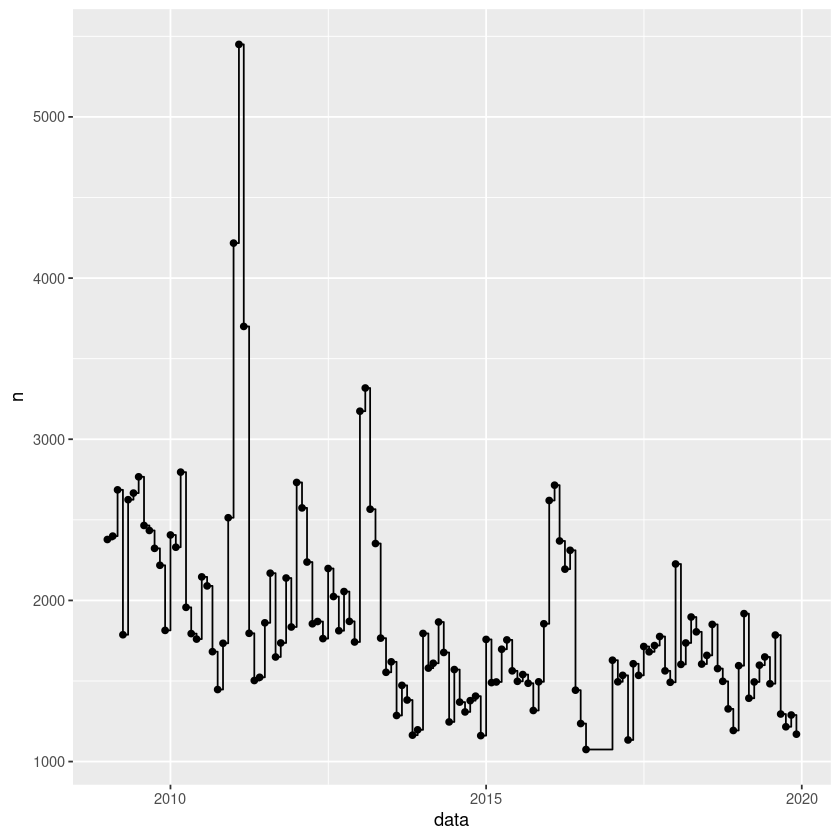

In [40]:
# Incidência de Casos Positivos e Negativos
# Plotando gráfico 
print("Grafico de Casos Negativos")
ggplot(data=negative, 
       aes(x=data, y=n, group=1)
      ) +
  geom_step()+
  geom_point()


[1] "Grafico de Casos Positivos"


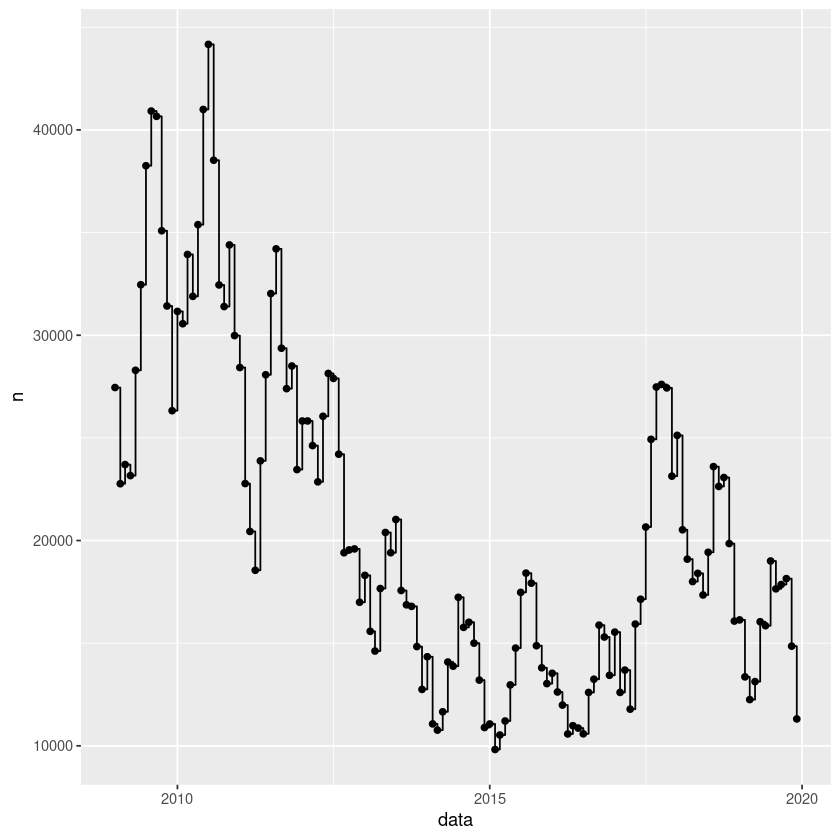

In [41]:
print("Grafico de Casos Positivos")
ggplot(data=positive, 
       aes(x=data, y=n, group=1)
      ) +
  geom_step()+
  geom_point()
